# Titanic: Data Analysis with Visualizations
<pre>
Udacity - Intro to Data Analysis
Udacity - Data Analyst Nanodegree Program
Author: Leonardo Simões
</pre>

## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#data_wrangling) 
- [Gather](#gather)
- [Dataset requirements](#requirements)
- [Assessing](#assessing)
- [Clean](#clean)
- [Exploratory analysis](#eda)

<a id='intro'></a>
## Introduction
This is a project for the Intro to Data Analysis course and for the Nanodegree program Data Analyst, both from Udacity.
The main objective is to use well-polished data visualizations to convey ideas and confirm the information obtained.
The other steps of the data analysis process are also carried out in this project, but only in a necessary and not very detailed way.


The dataset is the one suggested at the end of the Introduction to Data Analysis course, but it also satisfies the conditions imposed on the respective task of the data analyst in the Nanodegree program. This dataset is a large portion of Titanic passengers and was made available by Kaggle. Data analysis is focused on the characteristics of Titanic passengers.

<a id='data_wrangling'></a>
## Data Wrangling

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [107]:
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='gather'></a>
### Gather

In [108]:
dataset_file = 'titanic_data.csv'
df = pd.read_csv(dataset_file)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Features: 
- `Survived`: Survival (0 = No, 1 = Yes)
- `Pclass`:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- `Name`: name of passenger
- `Sex`: male or female 	
- `Age`: Age in years 	
- `Sibsp`: # of siblings / spouses aboard the Titanic 	
- `Parch`: # of parents / children aboard the Titanic 	
- `Ticket`:	Ticket number 	
- `Fare`: Passenger fare 	
- `Cabin`: Cabin number 	
- `Embarked`: Port of Embarkation ('S' = Southampton, 'C' = Cherbourg, 'Q' = Queenstown)

Survival, Ticket class, Sex, Age, Sibsp, Parch, Fare and Embarked features will be used in the analysis.

The Name, Ticket number and Cabin number features will not be used in the analysis.


<a id='requirements'></a>
### Dataset requirements

Verifying that the dataset meets the requirements:

- include at least 600 observations:

In [109]:
df.shape[0]

891

- include at least 8 variables:

In [110]:
len(df.columns)

12

- include at least one qualitative / categorical variable;
- include at least one numeric variable:

In [111]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Be in a common data format, this includes .csv, .tsv, .txt, and .xls. 

In [112]:
dataset_file

'titanic_data.csv'

- Be in a tidy format (tidy data has each row as a single observation and each column reporting a single variable).

In [113]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
805,806,0,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.775,NaN,S


### Assessing

Checking general column information:

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking for the presence of NaN values:

In [115]:
na_values = df.isna().sum()
na_values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

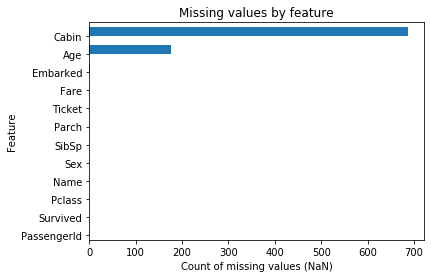

In [116]:
#Plot of the NaN values
na_values.sort_values().plot(kind='barh', position=0)
plt.title('Missing values by feature');
plt.xlabel('Count of missing values (NaN)');
plt.ylabel('Feature');

There are missing values in the Age, Cabin and Embarked columns.

Checking for duplicate lines:

In [117]:
df.duplicated().sum()

0

- Plot for general insights into quantitative variables and their relationships:

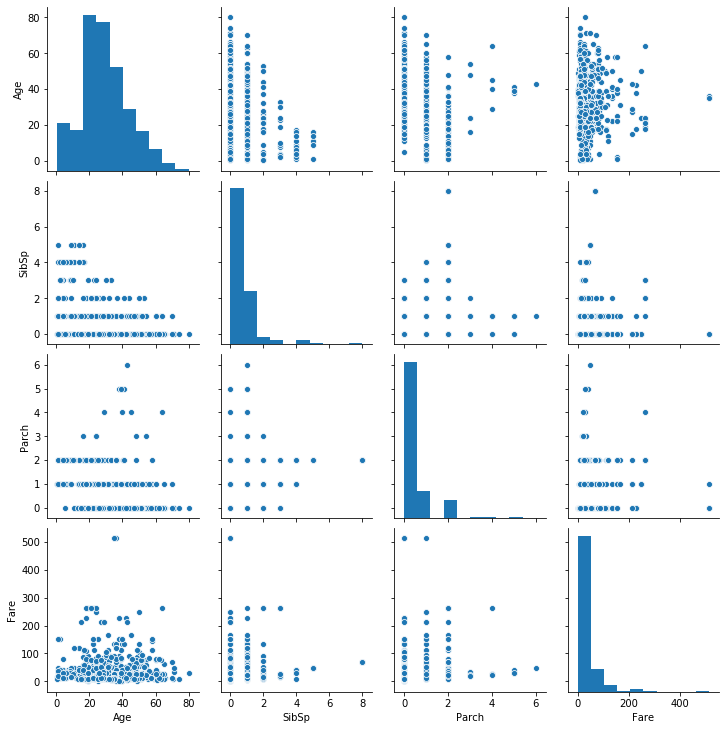

In [118]:
#PairPlot of the quantitatives features
sns.pairplot(df.drop(['PassengerId', 'Pclass', 'Survived'], axis=1));

### Clean

- Fill Cabin NaN values with 'None'.

In [119]:
df['Cabin'].fillna('None', inplace = True)

In [120]:
assert df['Cabin'].isna().sum() == 0

- Fill Age NaN values with the median.

In [121]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [122]:
assert df['Age'].isna().sum() == 0

- Fill Embarked NaN values with 'O' of 'Others'.

In [123]:
df['Embarked'].fillna('O', inplace = True)

In [124]:
assert df['Embarked'].isna().sum() == 0

<a id='eda'></a>
## Exploratory analysis

This analysis, unlike the standard, will not answer previously asked and well-established questions. This analysis will be done by observing the values and relationships between the variables, and then with values and visualizations, some observations will be made. First, a one-dimensional exploratory analysis will be carried out, and then a two-dimensional analysis, and then a multidimensional analysis.

- Descriptive statistics of numerical features:

In [125]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
num_passengers = df.shape[0]
num_passengers

891

### Univariate Exploration

- Proportion of survivors:

In [127]:
survived_counts = df['Survived'].value_counts()
survived_counts.index = ['Not Survivors', 'Survivors']
survived_counts

Not Survivors    549
Survivors        342
Name: Survived, dtype: int64

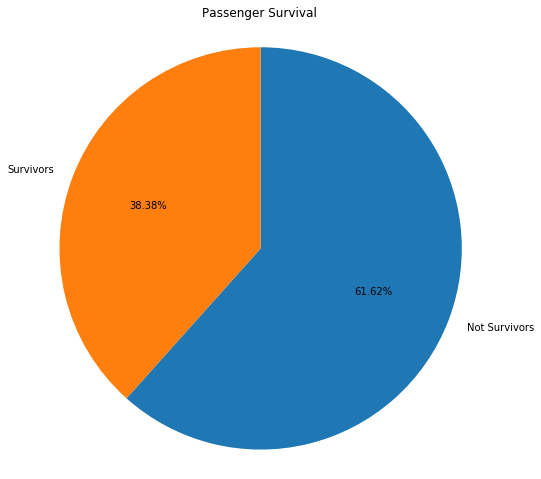

In [128]:
#Plot of pie chart of survivors
plt.figure(figsize=[11.69,8.27]);
plt.pie(survived_counts, labels=survived_counts.index, 
        startangle=90,counterclock=False, autopct='%1.2f%%');
plt.axis('square');
plt.title('Passenger Survival');

Of the 891 passengers, 549 (61.62%) did not survive and 342 (38.38%) survived.

- Count of passengers by class:

In [129]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

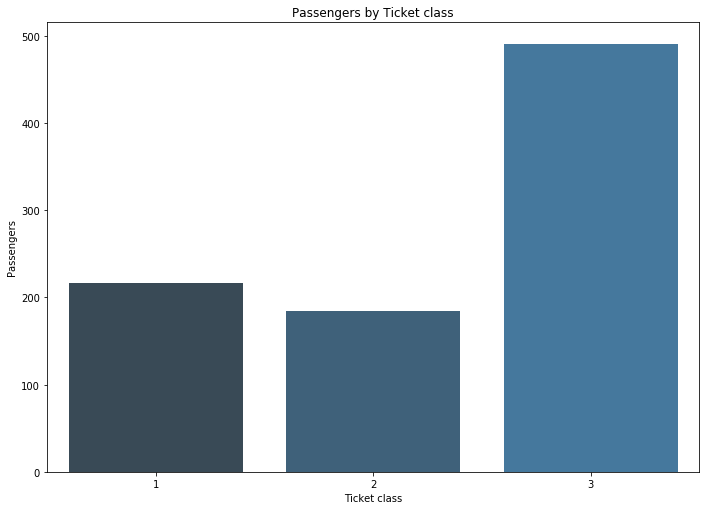

In [130]:
#Plot of passenger bar chart by Ticket Class
color = sns.color_palette("Blues_d")
plt.figure(figsize=[11.69,8.27]);
sns.countplot(df['Pclass'], palette=color);
plt.title('Passengers by Ticket class');
plt.ylabel('Passengers');
plt.xlabel('Ticket class');

Class 3 has 491 passengers, more than the other two combined, being class 1 with 216 and class 2 with 184 passengers.

- Count of passengers by sex:

In [131]:
sex_counts = df['Sex'].value_counts()
sex_counts

male      577
female    314
Name: Sex, dtype: int64

In [132]:
#Proportion of male passengers and female passengers
sex_counts['male']/num_passengers, sex_counts['female']/num_passengers

(0.6475869809203143, 0.35241301907968575)

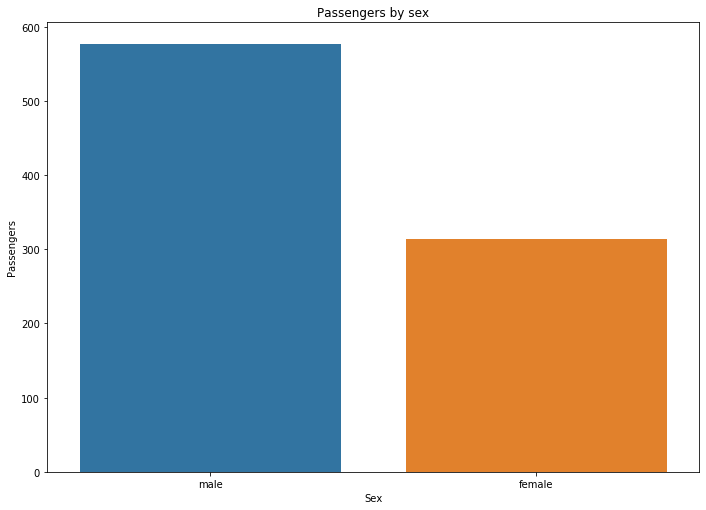

In [133]:
#Plot of passenger bar graph by Sex
plt.figure(figsize=[11.69,8.27]);
sns.countplot(df['Sex']);
plt.title('Passengers by sex');
plt.ylabel('Passengers');
plt.xlabel('Sex');

There are more male passengers, 577 (about 65%), than women, which are 314 (about 35%).

- Age of passengers:

In [134]:
df.describe()['Age']

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

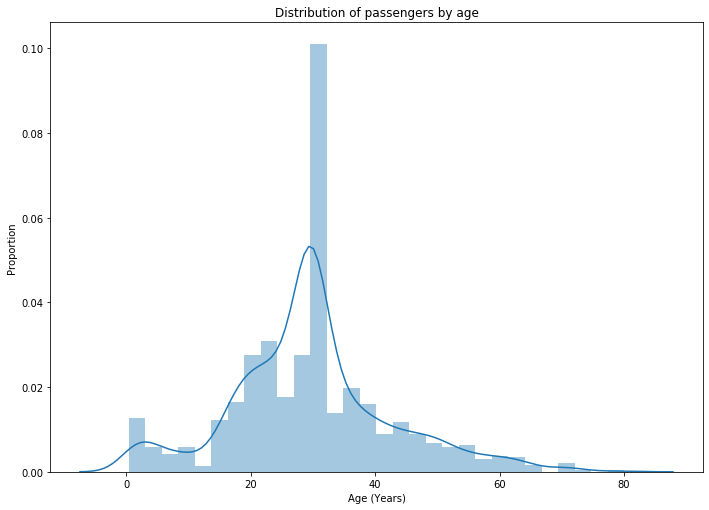

In [135]:
#Plot of passenger age histogram
plt.figure(figsize=[11.69,8.27]);
sns.distplot(df['Age'], kde=True, rug=False);
plt.title('Distribution of passengers by age');
plt.ylabel('Proportion');
plt.xlabel('Age (Years)');

The oldest passenger was 80 years old. The average age of passengers is approximately 29 years.

- Number of siblings / spouses aboard the Titanic: 

In [136]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

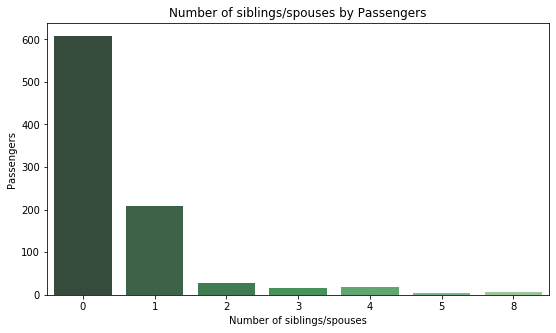

In [137]:
#Plot of bar graph of Number of siblings/spouses by Passengers
plt.figure(figsize=[9,5]);
sns.countplot(df['SibSp'], palette="Greens_d");
plt.xlabel('Number of siblings/spouses');
plt.ylabel('Passengers');
plt.title('Number of siblings/spouses by Passengers');

In [138]:
#Percentage of passengers with siblings / spouses on the ship
df.query('SibSp > 0').shape[0]/df.shape[0]

0.3176206509539843

- Number of parents / children aboard the Titanic: 

In [139]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

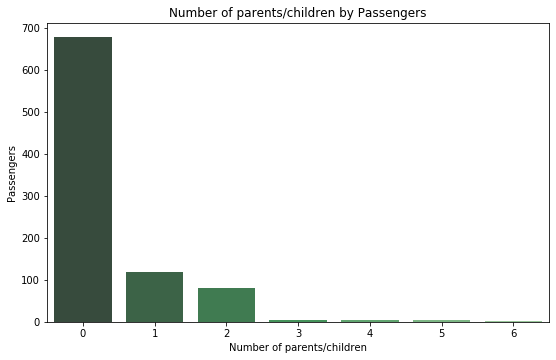

In [140]:
#Plot of bar graph of Number of parents/children by Passengers
plt.figure(figsize=[9,5.5]);
sns.countplot(df['Parch'], palette="Greens_d");
plt.xlabel('Number of parents/children');
plt.ylabel('Passengers');
plt.title('Number of parents/children by Passengers');

In [141]:
#Percentage of passengers with parents / childrenon the ship
df.query('Parch > 0').shape[0]/df.shape[0]

0.23905723905723905

- Passenger fare: 

In [142]:
df.describe()['Fare']

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [143]:
#Lowest non-free fare price
df.query('Fare > 0').Fare.describe()['min']

4.0125

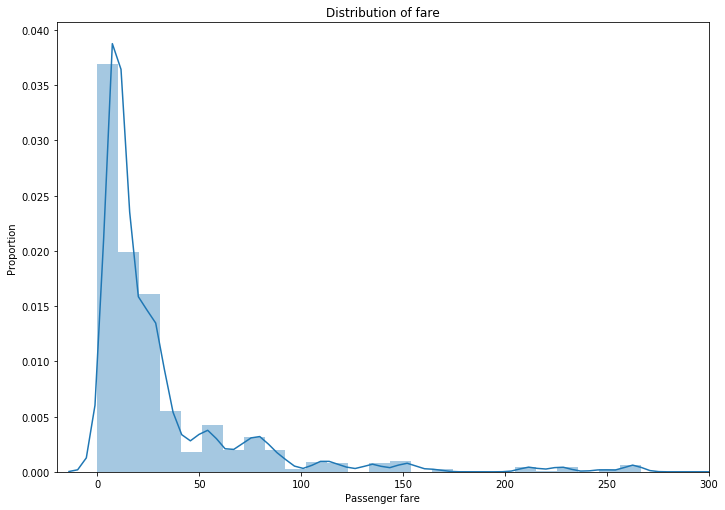

In [144]:
#Plot of passenger Fare histogram
plt.figure(figsize=[11.69,8.27]);
sns.distplot(df['Fare'], kde=True, rug=False);
plt.title('Distribution of fare');
plt.xlabel('Passenger fare');
plt.ylabel('Proportion');
plt.xlim(-20, 300);

The average fare value is 32.20 and the most expensive was 512.32. The lowest price paid for a ticket (excluding free tickets) was 4.01.

- Embarked:

In [145]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
O      2
Name: Embarked, dtype: int64

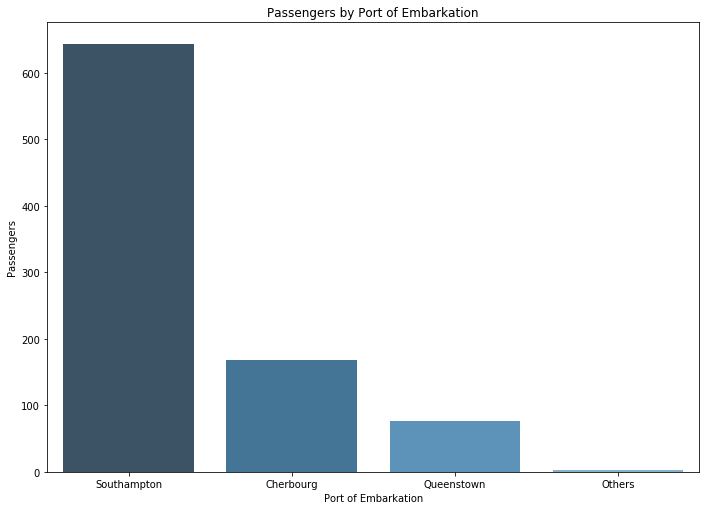

In [146]:
#Plot of bar graph of Number of Passengers per Port of Embarkation
plt.figure(figsize=[11.69,8.27]);
g = sns.countplot(df['Embarked'], palette= "Blues_d");
plt.ylabel('Passengers');
plt.xlabel('Port of Embarkation');
plt.title('Passengers by Port of Embarkation');
g.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown', 'Others']);

### Bivariate Exploration

- Age and Survived:

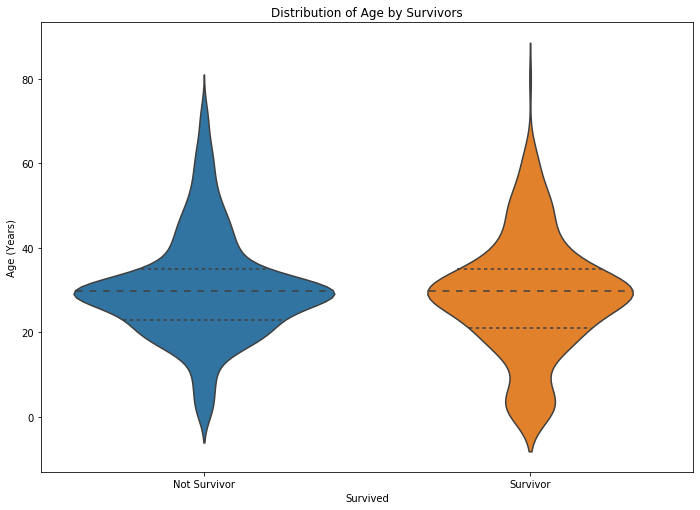

In [147]:
#ViolinPlot of the distribtion of Age by Survivors
plt.figure(figsize=[11.69,8.27]);
ax = sns.violinplot(data=df, x='Survived', y='Age', inner='quartile');
ax.set_xticklabels(['Not Survivor', 'Survivor']);
ax.set_title('Distribution of Age by Survivors');
ax.set_ylabel('Age (Years)');

Most survivors are in the 15 to 40 age range. For females, children under 15 survived much longer than males of the same age.

- Age and Sex:

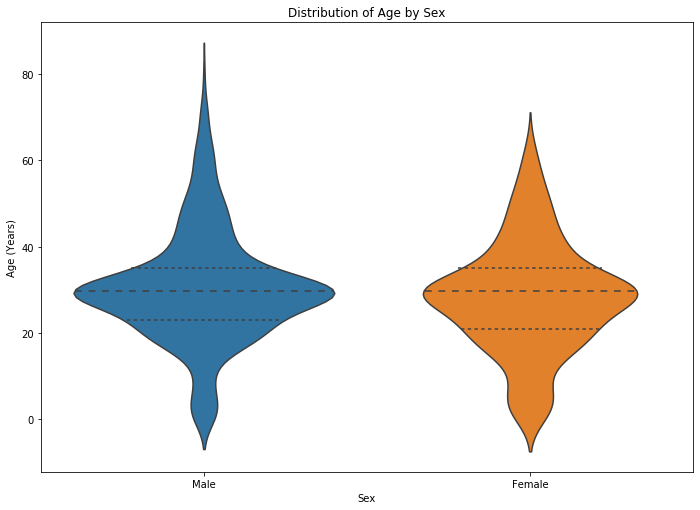

In [148]:
#ViolinPlot of the distribtion of Age by Sex
plt.figure(figsize=[11.69,8.27]);
ax = sns.violinplot(data=df, x='Sex', y='Age', inner='quartile');
ax.set_xticklabels(['Male', 'Female']);
ax.set_title('Distribution of Age by Sex');
ax.set_ylabel('Age (Years)');

Most of the population was in the 15 to 40 range. Most passengers under the age of 15 were female. Most passengers over 70 years old were men.

- Embarked and Fare:

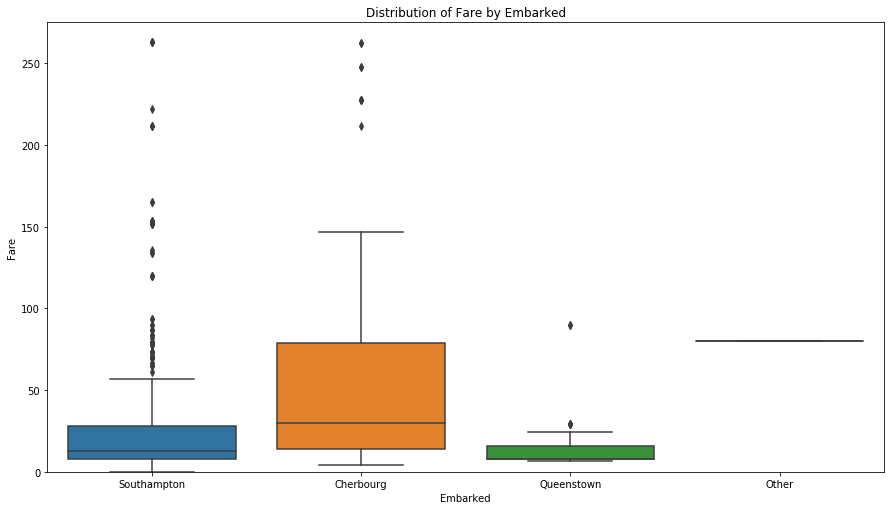

In [149]:
#Boxplot of Fare in each Ticket class
plt.figure(figsize=[15,8.27]);
ax = sns.boxplot(data=df, x='Embarked', y='Fare');
ax.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown', 'Other'])
ax.set_title('Distribution of Fare by Embarked');
ax.set_ylim(0,275);

Fare value ranges vary considerably depending on where the shipment was made. Most of those who boarded Cherbourg paid much more than elsewhere. Queenstown people paid much less.
The few passengers who paid much more than the others boarded Southampton or Cherbourg.

- Sex and Ticket class:

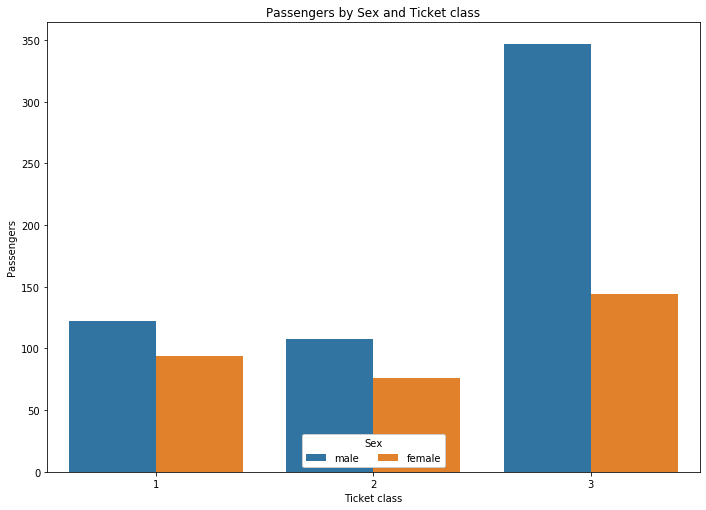

In [150]:
#Plot of clustered bar chart using count of passenger, Ticket class and Sex
plt.figure(figsize=[11.69,8.27]);
ax = sns.countplot(data=df, x='Pclass', hue='Sex');
ax.legend(loc=8, ncol=3, framealpha=1, title='Sex');
ax.set_title('Passengers by Sex and Ticket class');
ax.set_ylabel('Passengers');
ax.set_xlabel('Ticket class');

### Multivariate Exploration

- Embarked, Age and Sex:

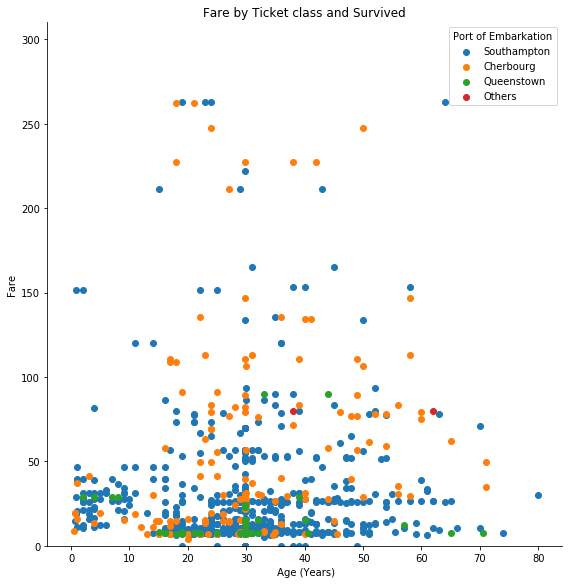

In [151]:
#Plot of scatter using Fare, Ticket class and Survived
g = sns.FacetGrid(data = df, hue = 'Embarked', height = 8);
g = g.map(plt.scatter, 'Age', 'Fare');
g = g.set(ylabel='Fare', ylim = (0,310), xlabel=' Age (Years)', title='Fare by Ticket class and Survived')
plt.legend(title='Port of Embarkation', labels=['Southampton','Cherbourg','Queenstown', 'Others']);

There does not seem to be a trend between the combined Fare, Age and Embarked features.

- Age by Sex and Class:

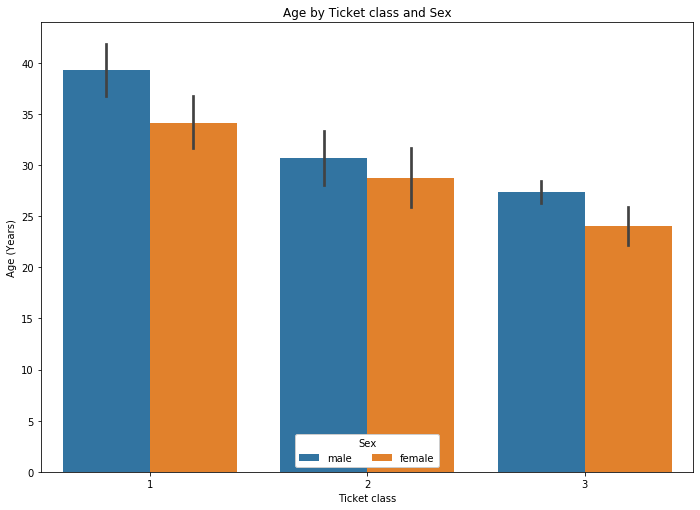

In [152]:
#Plot of clustered bar chart using Age, Ticket class and Sex
plt.figure(figsize=[11.69,8.27]);
ax = sns.barplot(data = df, x = 'Pclass', y = 'Age', hue = 'Sex');
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex');
ax.set_xlabel('Ticket class');
ax.set_ylabel('Age (Years)');
ax.set_title('Age by Ticket class and Sex');

In all classes, women on average would be younger than men.

- Fare by Sex and Survived:

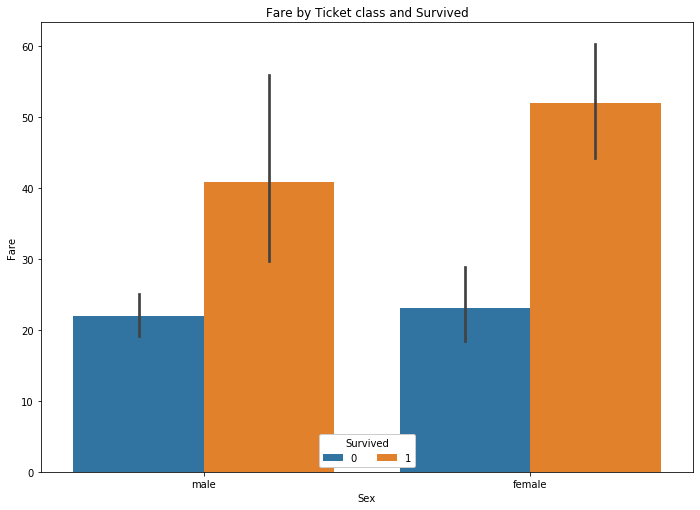

In [153]:
#Plot of clustered bar chart using Fare, Ticket class and Survived
plt.figure(figsize=[11.69,8.27]);
ax = sns.barplot(data = df, y = 'Fare', x = 'Sex', hue = 'Survived');
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Survived');
ax.set_title('Fare by Ticket class and Survived');

On average, survivors, both men and women, paid much more than non-survivors.

- Mean age by Survived and Sex:

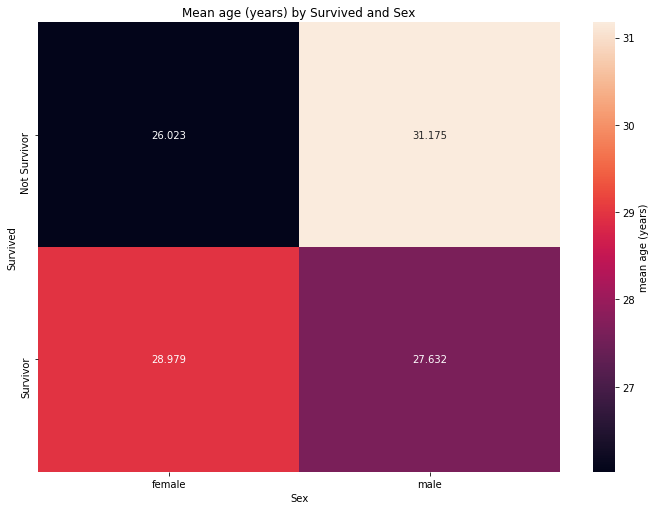

In [154]:
#Plot of heatmap using average Age by Sex and by Survived
plt.figure(figsize=[11.69,8.27]);
cat_means = df.groupby(['Sex', 'Survived']).mean()['Age']
cat_means = cat_means.reset_index(name = 'Age_avg');
cat_means = cat_means.pivot(index = 'Survived', columns = 'Sex',
                            values = 'Age_avg');
ax = sns.heatmap(cat_means, annot = True, fmt = '.3f',
                   cbar_kws = {'label' : 'mean age (years)'}, 
                 yticklabels=['Not Survivor', 'Survivor']);
ax.set_title('Mean age (years) by Survived and Sex');

The average age of men and women for survivors and non-survivors varies up to just 5 years. Older women seem to have survived longer than younger women. With the men, it was the opposite, the younger ones seem to have survived longer than the older ones.

### References

UDACITY - Intro to Data Analysis: https://www.udacity.com/course/intro-to-data-analysis--ud170

UDACITY - Data Analyst Nanodegree Program: https://www.udacity.com/course/data-analyst-nanodegree--nd002

KAGGLE - https://www.kaggle.com/c/titanic/data